In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

data = pd.read_csv("winequalityN.csv")

In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## deal with missing values

In [5]:
# deal with missing values
data.isnull().any(axis=1).sum()

34

In [6]:
# Since the number of rows with missing values is relatively small, we just drop those rows
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [7]:
# Normalize the numeric features
from sklearn.preprocessing import StandardScaler
num_cols = data.columns.drop(['type', 'quality'])
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922,6
1,white,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184,6
2,white,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265,6
3,white,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,6
4,white,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,6


## Data processing

In [8]:
# check quality distribution
data['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [9]:
# Since the number of instances belong to quality == 9 is very very small, technically we don't believe there's a way to 
# train an effective model to predict it. So we're going to drop them
indexNames = data[data['quality'] == 9].index
data.drop(indexNames , inplace=True)
data['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
Name: quality, dtype: int64

In [10]:
# Encoding the type of wine
data = pd.get_dummies(data)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922,6,0,1
1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184,6,0,1
2,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265,6,0,1
3,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,6,0,1
4,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,-0.321892,1.703315,-1.643871,-0.745079,0.340545,-0.141736,-1.374580,0.603864,1.255423,1.939871,-0.832184,6,1,0
6492,-0.784208,1.581828,-1.643871,-0.724055,0.967807,0.083522,-1.268427,0.067414,1.442179,0.328071,0.006014,5,1,0
6494,-0.707155,1.035136,-1.299616,-0.660984,0.568640,-0.085421,-1.339195,0.347301,1.255423,1.469762,0.425113,6,1,0
6495,-1.015366,1.855174,-1.368467,-0.724055,0.540129,0.083522,-1.268427,0.257337,2.189203,1.201129,-0.245446,5,1,0


## Generate datasets for white and red wine

In [11]:
# Create two subsets -- redwine subset && whitewine subset
data_redwine = data[data['type_red'] == 1]
data_redwine.drop(['type_red', 'type_white'], axis=1, inplace=True)
data_redwine = data_redwine.reset_index(drop=True)
data_redwine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.140425,2.189264,-2.194680,-0.745079,0.568640,-1.099081,-1.445348,1.033690,1.815691,0.193754,-0.916004,5
1,0.448636,3.282648,-2.194680,-0.597912,1.195902,-0.310679,-0.861508,0.700491,-0.114121,0.999654,-0.580725,5
2,0.448636,2.553725,-1.919275,-0.660984,1.024830,-0.873823,-1.091506,0.767131,0.259391,0.798179,-0.580725,5
3,3.068428,-0.361966,1.660980,-0.745079,0.540129,-0.761194,-0.985353,1.100330,-0.363128,0.328071,-0.580725,6
4,0.140425,2.189264,-2.194680,-0.745079,0.568640,-1.099081,-1.445348,1.033690,1.815691,0.193754,-0.916004,5


In [12]:
data_whitewine = data[data['type_white'] == 1]
data_whitewine.drop(['type_red', 'type_white'], axis=1, inplace=True)
data_whitewine = data_whitewine.reset_index(drop=True)
data_whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922,6
1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184,6
2,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265,6
3,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,6
4,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,6


Preprocessing of the dataset with both white/red wine

In [13]:
# Split the features and the target for the dataset 
y = pd.DataFrame(data['quality'])
X = data.drop(['quality'], axis=1, inplace=False)
y

,quality
0,6
1,6
2,6
3,6
4,6
...,...
6491,6
6492,5
6494,6
6495,5


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6458 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6458 non-null   float64
 1   volatile acidity      6458 non-null   float64
 2   citric acid           6458 non-null   float64
 3   residual sugar        6458 non-null   float64
 4   chlorides             6458 non-null   float64
 5   free sulfur dioxide   6458 non-null   float64
 6   total sulfur dioxide  6458 non-null   float64
 7   density               6458 non-null   float64
 8   pH                    6458 non-null   float64
 9   sulphates             6458 non-null   float64
 10  alcohol               6458 non-null   float64
 11  type_red              6458 non-null   uint8  
 12  type_white            6458 non-null   uint8  
dtypes: float64(11), uint8(2)
memory usage: 618.1 KB


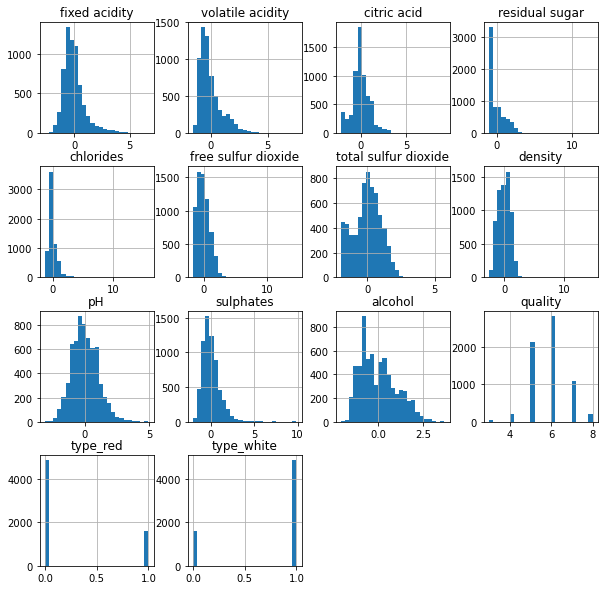

In [15]:
# display histogram
data.hist(bins=25,figsize=(10,10))
plt.show()

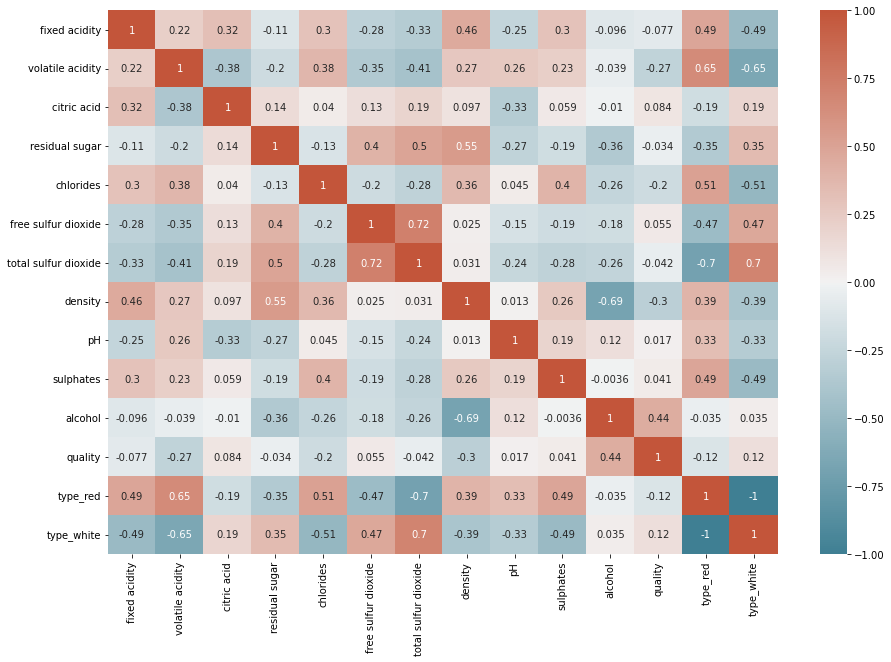

In [16]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

quality
6          2820
5          2128
7          1074
4           214
8           192
3            30
dtype: int64


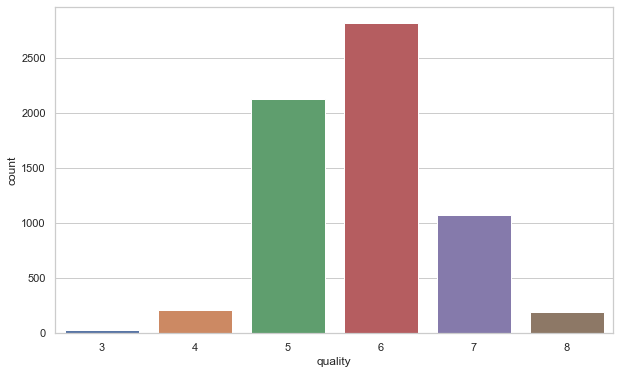

In [17]:
# Check the distribution of target columns, and virtualize
sns.set(style="whitegrid")
print(y.value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=data)

## Deal with data imbalancing

In [18]:
# Class distribution very imbalanced. Oversample the minorities
from imblearn.over_sampling import BorderlineSMOTE
import collections
oversampler = BorderlineSMOTE(k_neighbors=4, m_neighbors=4)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [19]:
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

quality
8          2820
7          2820
6          2820
5          2820
4          2820
3          2820
dtype: int64


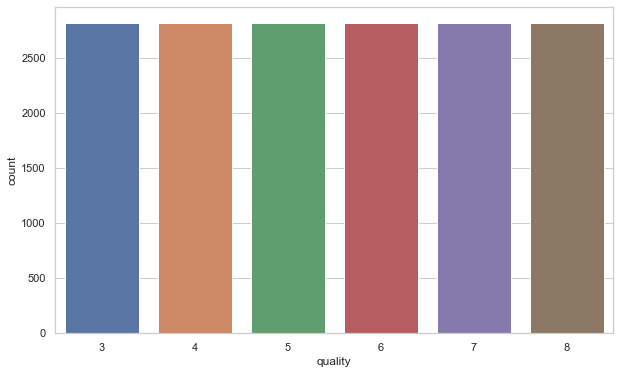

In [20]:
# Virtualize the distribution after oversampling
sns.set(style="whitegrid")
print(y_oversampled.value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=y_oversampled)

In [21]:
# Split train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (13536, 13)
Shape of testing feature: (3384, 13)
Shape of training label: (13536, 1)
Shape of training label: (3384, 1)


## Check outliers

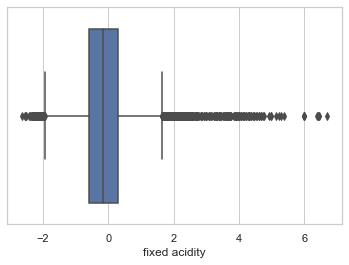

In [22]:
# Check for any outlier
sns.boxplot(X_train['fixed acidity'])

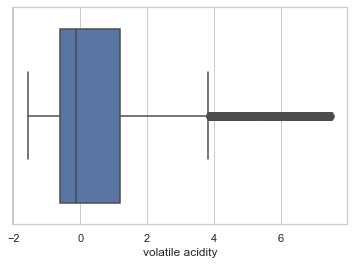

In [23]:
# Check for any outlier
sns.boxplot(X_train['volatile acidity'])

In [24]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
mask = yhat != -1
# print(yhat)
# print(X_train[mask])
X_train, y_train = X_train[mask], y_train[mask]
print('Shape of training feature:', X_train.shape)
print('Shape of training label:', y_train.shape)

Shape of training feature: (12182, 13)
Shape of training label: (12182, 1)


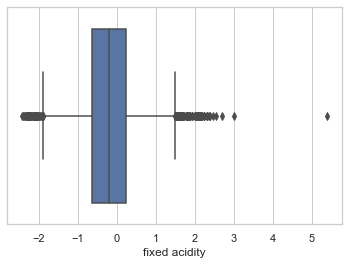

In [25]:
# Check result of remove outliers
sns.boxplot(X_train['fixed acidity'])

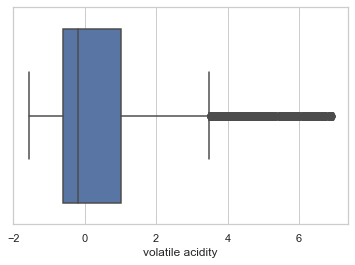

In [26]:
# Check result of remove outliers
sns.boxplot(X_train['volatile acidity'])

Preprocessing the sub dataset with only red wine

In [27]:
# Split the features and the target for the dataset 
y_red = pd.DataFrame(data_redwine['quality'])
X_red = data_redwine.drop(['quality'], axis=1, inplace=False)
y_red

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1588,6
1589,5
1590,6
1591,5


In [28]:
X_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1593 non-null   float64
 1   volatile acidity      1593 non-null   float64
 2   citric acid           1593 non-null   float64
 3   residual sugar        1593 non-null   float64
 4   chlorides             1593 non-null   float64
 5   free sulfur dioxide   1593 non-null   float64
 6   total sulfur dioxide  1593 non-null   float64
 7   density               1593 non-null   float64
 8   pH                    1593 non-null   float64
 9   sulphates             1593 non-null   float64
 10  alcohol               1593 non-null   float64
dtypes: float64(11)
memory usage: 137.0 KB


quality
5          680
6          634
7          199
4           52
8           18
3           10
dtype: int64


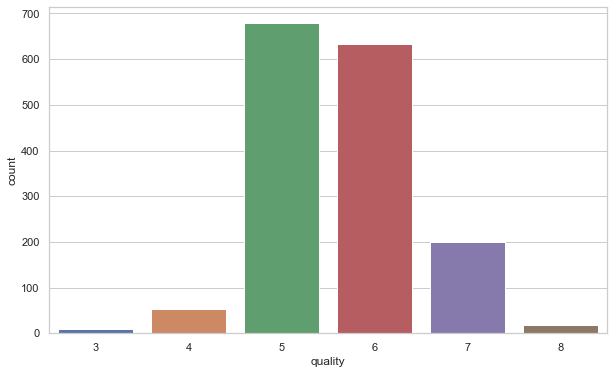

In [29]:
# Check the distribution of target columns, and virtualize
sns.set(style="whitegrid")
print(y_red.value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=data_redwine)

In [30]:
# Class distribution very imbalanced. Oversample the minorities
oversampler_red = BorderlineSMOTE()
X_red_oversampled, y_red_oversampled = oversampler_red.fit_resample(X_red, y_red)

quality
8          680
7          680
6          680
5          680
4          680
3          680
dtype: int64


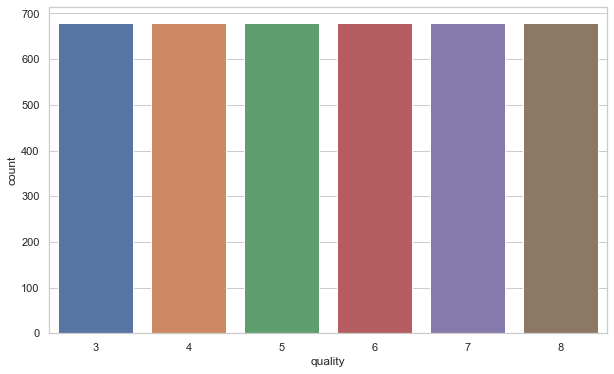

In [31]:
# Virtualize the distribution after oversampling
sns.set(style="whitegrid")
print(y_red_oversampled.value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=y_red_oversampled)

In [32]:
# Split train/test sets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_oversampled, y_red_oversampled, test_size=0.2)
print('Shape of training feature:', X_red_train.shape)
print('Shape of testing feature:', X_red_test.shape)
print('Shape of training label:', y_red_train.shape)
print('Shape of training label:', y_red_test.shape)

Shape of training feature: (3264, 11)
Shape of testing feature: (816, 11)
Shape of training label: (3264, 1)
Shape of training label: (816, 1)


In [33]:
# Check for any outlier
# Reference: https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_red_train)
mask = yhat != -1
# print(yhat)
# print(X_train[mask])
X_red_train, y_red_train = X_red_train[mask], y_red_train[mask]
print('Shape of training feature:', X_red_train.shape)
print('Shape of training label:', y_red_train.shape)

Shape of training feature: (2937, 11)
Shape of training label: (2937, 1)


Preprocessing the sub dataset with only white wine

In [34]:
# Split the features and the target for the dataset 
y_white = pd.DataFrame(data_whitewine['quality'])
X_white = data_whitewine.drop(['quality'], axis=1, inplace=False)
y_white

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4860,6
4861,6
4862,5
4863,7


In [35]:
X_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4865 non-null   float64
 1   volatile acidity      4865 non-null   float64
 2   citric acid           4865 non-null   float64
 3   residual sugar        4865 non-null   float64
 4   chlorides             4865 non-null   float64
 5   free sulfur dioxide   4865 non-null   float64
 6   total sulfur dioxide  4865 non-null   float64
 7   density               4865 non-null   float64
 8   pH                    4865 non-null   float64
 9   sulphates             4865 non-null   float64
 10  alcohol               4865 non-null   float64
dtypes: float64(11)
memory usage: 418.2 KB


quality
6          2186
5          1448
7           875
8           174
4           162
3            20
dtype: int64


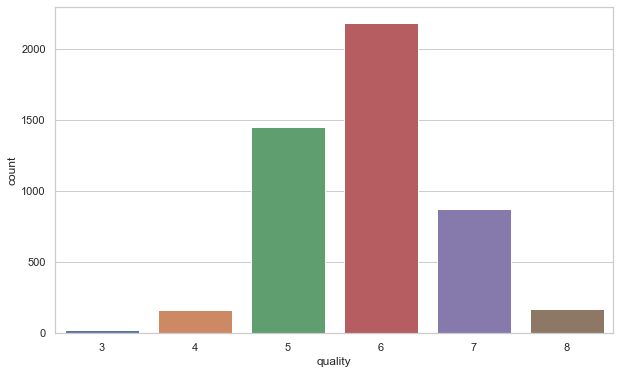

In [36]:
# Check the distribution of target columns, and virtualize
sns.set(style="whitegrid")
print(y_white.value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=data_whitewine)

In [37]:
# Class distribution very imbalanced. Oversample the minorities
oversampler_white = BorderlineSMOTE(k_neighbors=4, m_neighbors=4)
X_white_oversampled, y_white_oversampled = oversampler_white.fit_resample(X_white, y_white)

quality
8          2186
7          2186
6          2186
5          2186
4          2186
3          2186
dtype: int64


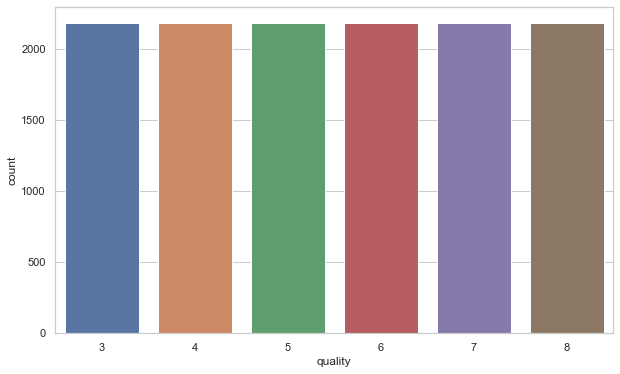

In [38]:
# Virtualize the distribution after oversampling
sns.set(style="whitegrid")
print(y_white_oversampled.value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=y_white_oversampled)

In [39]:
# Split train/test sets
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_oversampled, y_white_oversampled, test_size=0.2)
print('Shape of training feature:', X_white_train.shape)
print('Shape of testing feature:', X_white_test.shape)
print('Shape of training label:', y_white_train.shape)
print('Shape of training label:', y_white_test.shape)

Shape of training feature: (10492, 11)
Shape of testing feature: (2624, 11)
Shape of training label: (10492, 1)
Shape of training label: (2624, 1)


In [40]:
# Check for any outlier
# Reference: https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_white_train)
mask = yhat != -1
# print(yhat)
# print(X_train[mask])
X_white_train, y_white_train = X_white_train[mask], y_white_train[mask]
print('Shape of training feature:', X_white_train.shape)
print('Shape of training label:', y_white_train.shape)

Shape of training feature: (9445, 11)
Shape of training label: (9445, 1)


## Neural Network Training

In [41]:
# neural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [42]:
sc_all=StandardScaler()
scaler = sc_all.fit(X_train)
trainX_scaled_all = scaler.transform(X_train)
testX_scaled_all = scaler.transform(X_test)

sc_white=StandardScaler()
scaler = sc_white.fit(X_white_train)
trainX_scaled_white = scaler.transform(X_white_train)
testX_scaled_white = scaler.transform(X_white_test)

# standard data
sc_red=StandardScaler()
scaler = sc_red.fit(X_red_train)
trainX_scaled_red = scaler.transform(X_red_train)
testX_scaled_red = scaler.transform(X_red_test)

In [43]:
# tuning number of nodes in each layer

m = []
test_scores = []
for x in range(20, 401, 20):
    m.append(x)
    mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(x,x), alpha=1e-2, max_iter=2000, random_state=1)
    mlp.fit(trainX_scaled_all,y_train)
    y_pred_test = mlp.predict(testX_scaled_all)
    test_scores.append(round(f1_score(y_pred_test, y_test, average='macro'), 4))

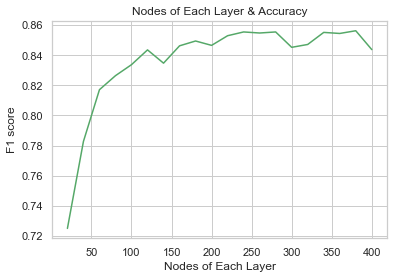

In [44]:
#visualize the result
plt.plot(m, test_scores, color="g", label="Testing score")
plt.xlabel('Nodes of Each Layer')
plt.ylabel('F1 score')
plt.title("Nodes of Each Layer & Accuracy")
plt.show()

In [45]:
# tuning number of layers

n = 130
lst = []
scores = []
train_scores = []
test_scores = []
for i in range(1, 6, 1):
    lst.append(n)
    mlp_all = MLPClassifier(solver='adam', hidden_layer_sizes=tuple(lst), alpha=1e-2, max_iter=2000, random_state=1)
    mlp_all.fit(trainX_scaled_all,y_train)
    print("TEST score: ")
    y_pred_all_test = mlp_all.predict(testX_scaled_all)
    scores.append(round(accuracy_score(y_pred_all_test, y_test), 4))

TEST score: 
TEST score: 
TEST score: 
TEST score: 
TEST score: 


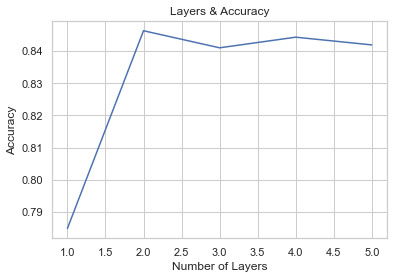

In [46]:
plt.plot([1,2,3,4,5], scores)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title("Layers & Accuracy")
plt.show()

In [47]:
# tuning Solver for weight optimization

lst = ['adam', 'sgd', 'lbfgs']
scores = []
for i in lst:
    mlp_all = MLPClassifier(solver=i, hidden_layer_sizes=(130, 130), alpha=1e-2, max_iter=2000, random_state=1)
    mlp_all.fit(trainX_scaled_all,y_train)
    print("TEST score: ")
    y_pred_all_test = mlp_all.predict(testX_scaled_all)
    print(classification_report(y_pred_all_test, y_test))
    scores.append(round(accuracy_score(y_pred_all_test, y_test), 4))

TEST score: 
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       576
           4       0.95      0.96      0.96       581
           5       0.76      0.69      0.72       597
           6       0.63      0.63      0.63       566
           7       0.78      0.84      0.81       489
           8       0.95      0.96      0.95       575

    accuracy                           0.85      3384
   macro avg       0.84      0.85      0.84      3384
weighted avg       0.85      0.85      0.85      3384

TEST score: 
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       573
           4       0.94      0.95      0.95       577
           5       0.76      0.66      0.71       622
           6       0.55      0.60      0.58       520
           7       0.78      0.78      0.78       525
           8       0.93      0.96      0.94       567

    accuracy                           0.83      33

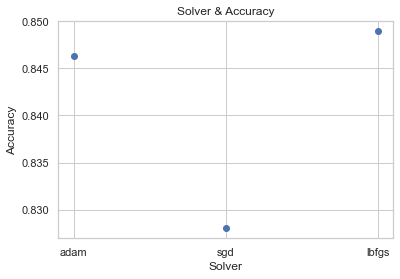

In [48]:
plt.scatter(['adam', 'sgd', 'lbfgs'], scores)
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title("Solver & Accuracy")
plt.show()

In [49]:
# tuning number of iterations

itr = []
scores = []
for x in range(1000, 5001, 1000):
    itr.append(x)
    mlp_all = MLPClassifier(solver='adam', hidden_layer_sizes=(130,130), alpha=1e-2, max_iter=x, random_state=1)
    mlp_all.fit(trainX_scaled_all,y_train)
    print("TEST score: ")
    y_pred_all_test = mlp_all.predict(testX_scaled_all)
    scores.append(round(accuracy_score(y_pred_all_test, y_test), 4))

print(itr)
print(scores)

TEST score: 
TEST score: 
TEST score: 
TEST score: 
TEST score: 
[1000, 2000, 3000, 4000, 5000]
[0.8463, 0.8463, 0.8463, 0.8463, 0.8463]


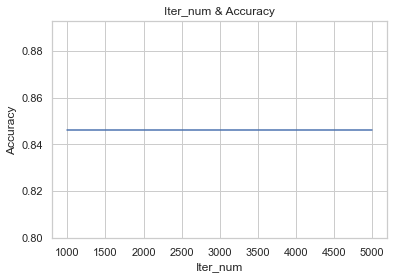

In [50]:
plt.plot(itr, scores)
plt.xlabel('Iter_num')
plt.ylabel('Accuracy')
plt.title("Iter_num & Accuracy")
plt.show()

In [51]:
# Train white wine

mlp_white = MLPClassifier(solver='adam', hidden_layer_sizes=(150,150), alpha=1e-2,
                        max_iter=2000, random_state=1)

mlp_white.fit(trainX_scaled_white,y_white_train)
print("White wine - Multi-class results")
print("Train data score")
y_pred_white_train = mlp_white.predict(trainX_scaled_white)
print(classification_report(y_pred_white_train, y_white_train))
print("Test data score")
y_pred_white_test = mlp_white.predict(testX_scaled_white)
print(classification_report(y_pred_white_test, y_white_test))

White wine - Multi-class results
Train data score
              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1636
           4       1.00      1.00      1.00      1471
           5       0.99      0.99      0.99      1457
           6       0.98      0.99      0.98      1555
           7       1.00      0.98      0.99      1713
           8       1.00      1.00      1.00      1613

    accuracy                           0.99      9445
   macro avg       0.99      0.99      0.99      9445
weighted avg       0.99      0.99      0.99      9445

Test data score
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       458
           4       0.95      0.98      0.96       402
           5       0.77      0.76      0.76       448
           6       0.61      0.70      0.65       380
           7       0.90      0.78      0.83       476
           8       0.96      0.95      0.96       460

    accurac

In [52]:
# Train red wine - multi-class

mlp_red = MLPClassifier(solver='adam', hidden_layer_sizes=(150,150), alpha=1e-2,
                        max_iter=2000, random_state=1)

mlp_red.fit(trainX_scaled_red,y_red_train)

print("Red wine - Multi-class results")
print("Train data score")
y_pred_red_train = mlp_red.predict(trainX_scaled_red)
print(classification_report(y_pred_red_train, y_red_train))

print("Test data score")
y_pred_red_test = mlp_red.predict(testX_scaled_red)
print(classification_report(y_pred_red_test, y_red_test))

Red wine - Multi-class results
Train data score
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       544
           4       1.00      1.00      1.00       519
           5       1.00      1.00      1.00       445
           6       1.00      1.00      1.00       466
           7       1.00      1.00      1.00       441
           8       1.00      1.00      1.00       522

    accuracy                           1.00      2937
   macro avg       1.00      1.00      1.00      2937
weighted avg       1.00      1.00      1.00      2937

Test data score
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       134
           4       0.96      0.95      0.96       137
           5       0.62      0.66      0.64       119
           6       0.68      0.60      0.64       159
           7       0.78      0.88      0.83       116
           8       0.98      0.99      0.98       151

    accuracy 

In [53]:
# Train all wine - multi-class



mlp_all = MLPClassifier(solver='adam', hidden_layer_sizes=(150,150), alpha=1e-3,
                        max_iter=2000, random_state=1)

mlp_all.fit(trainX_scaled_all,y_train)
print("All wine - Multi-class results")
print("Train data score")
y_pred_all_train = mlp_all.predict(trainX_scaled_all)
print(classification_report(y_pred_all_train, y_train))
print("Test data score")
y_pred_all_test = mlp_all.predict(testX_scaled_all)
print(classification_report(y_pred_all_test, y_test))

All wine - Multi-class results
Train data score
              precision    recall  f1-score   support

           3       1.00      1.00      1.00      2066
           4       1.00      1.00      1.00      2121
           5       1.00      0.91      0.95      2105
           6       0.90      0.99      0.94      1777
           7       0.99      0.99      0.99      1959
           8       1.00      1.00      1.00      2154

    accuracy                           0.98     12182
   macro avg       0.98      0.98      0.98     12182
weighted avg       0.98      0.98      0.98     12182

Test data score
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       573
           4       0.95      0.95      0.95       585
           5       0.79      0.65      0.71       661
           6       0.55      0.64      0.59       493
           7       0.79      0.83      0.81       504
           8       0.94      0.97      0.95       568

    accuracy 

## KNN Training

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn_classfier = KNeighborsClassifier()
knn_classfier.fit(X_train, y_train)
y_pred = knn_classfier.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8117612293144209

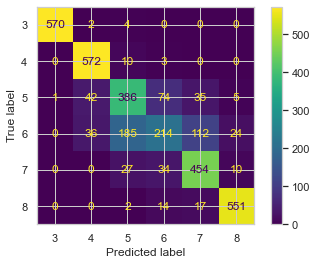

In [56]:
 # making confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pylab as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classfier.classes_)
disp.plot()
plt.show()

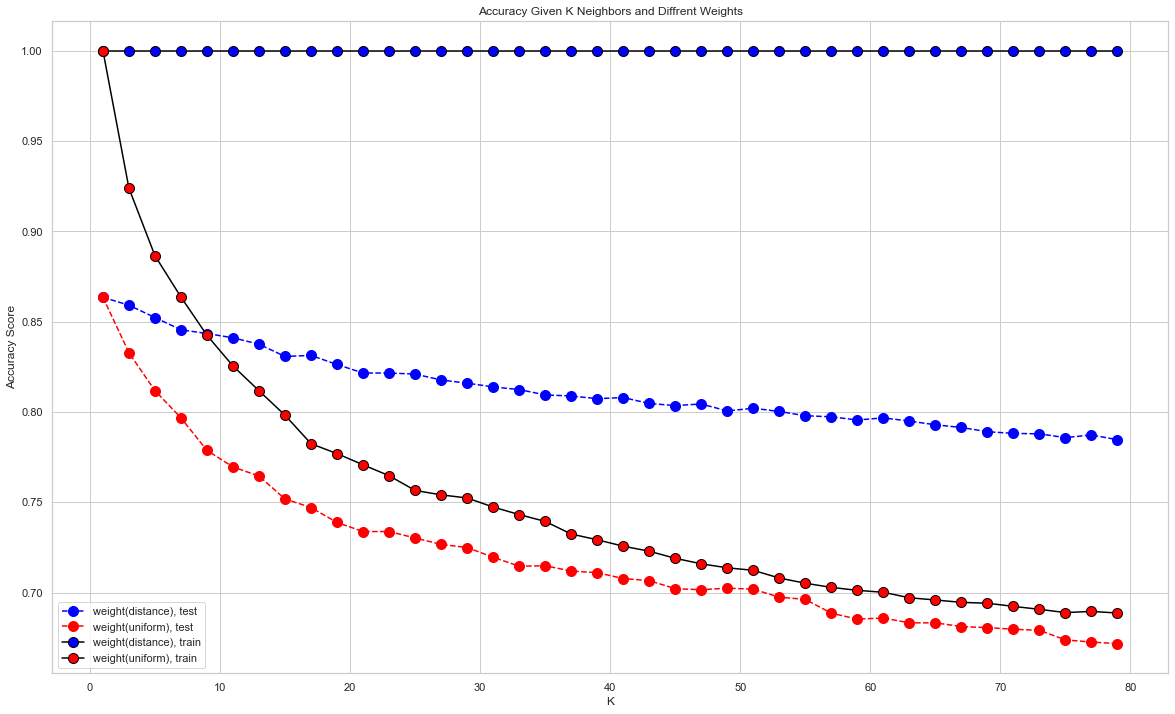

In [57]:
# Tuning parameters
test_accuracy_scores_distance = []
test_accuracy_scores_uniform = []

training_accuracy_distance = []
training_accuracy_uniform = []

for i in range(1, 80, 2):
    for w in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=i, weights=w)
        knn.fit(X_train, y_train)
        y_pred_i = knn.predict(X_test)
        acc_test = accuracy_score(y_test, y_pred_i)
        acc_training = accuracy_score(y_train, knn.predict(X_train))

        if w == 'uniform':
            test_accuracy_scores_uniform.append(acc_test)
            training_accuracy_uniform.append(acc_training)
        else:
            test_accuracy_scores_distance.append(acc_test)
            training_accuracy_distance.append(acc_training)

plt.figure(figsize =(20, 12))
plt.plot(range(1, 80, 2), test_accuracy_scores_distance, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='blue', markersize = 10, label='weight(distance), test')
plt.plot(range(1, 80, 2),test_accuracy_scores_uniform, color ='red',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10, label='weight(uniform), test')

plt.plot(range(1, 80, 2),training_accuracy_distance, color ='black',
				linestyle ='-', marker ='o',
		markerfacecolor ='blue', markersize = 10, label='weight(distance), train')
plt.plot(range(1, 80, 2),training_accuracy_uniform, color ='black',
				linestyle ='-', marker ='o',
		markerfacecolor ='red', markersize = 10, label='weight(uniform), train')


plt.title('Accuracy Given K Neighbors and Diffrent Weights')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.show()

In [58]:
# In order to minimize overfitting problem as well as getting a good accuracy
# we choose k = 40, weights = uniform
knn_best = KNeighborsClassifier(n_neighbors=40, weights = 'uniform')
knn_best.fit(X_train, y_train)
pred_best = knn_best.predict(X_test)

accuracy_best = accuracy_score(y_test, pred_best)
accuracy_best

0.7074468085106383

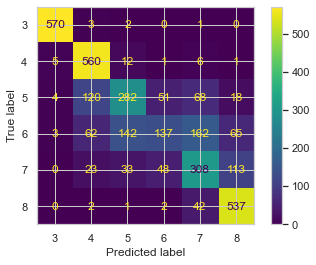

In [59]:
cm_best = confusion_matrix(y_test, pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=knn_best.classes_)
disp_best.plot()
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_best))

              precision    recall  f1-score   support

           3       0.98      0.99      0.98       576
           4       0.73      0.96      0.83       585
           5       0.60      0.52      0.56       543
           6       0.57      0.24      0.34       571
           7       0.52      0.59      0.55       525
           8       0.73      0.92      0.81       584

    accuracy                           0.71      3384
   macro avg       0.69      0.70      0.68      3384
weighted avg       0.69      0.71      0.68      3384



In [61]:
knn_red_classfier = KNeighborsClassifier()
knn_red_classfier.fit(X_red_train, y_red_train)
y_pred_red = knn_red_classfier.predict(X_red_test)

In [62]:
accuracy_red = accuracy_score(y_red_test, y_pred_red)
accuracy_red

0.7720588235294118

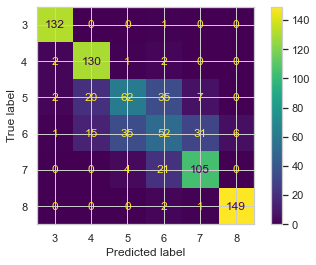

In [63]:
cm_red = confusion_matrix(y_red_test, y_pred_red)
disp_red = ConfusionMatrixDisplay(confusion_matrix=cm_red, display_labels=knn_red_classfier.classes_)
disp_red.plot()
plt.show()

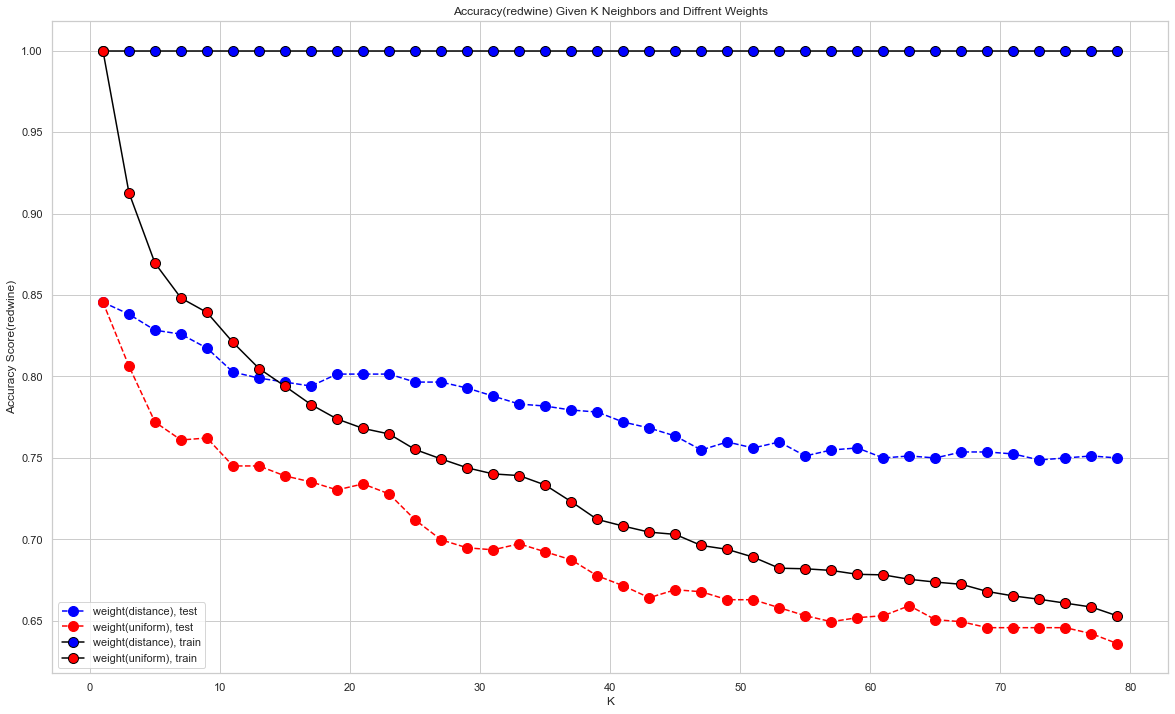

In [64]:
# Tuning parameters
red_test_accuracy_scores_distance = []
red_test_accuracy_scores_uniform = []

red_training_accuracy_distance = []
red_training_accuracy_uniform = []

for i in range(1, 80, 2):
    for w in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=i, weights=w)
        knn.fit(X_red_train, y_red_train)
        y_pred_i = knn.predict(X_red_test)
        acc_test = accuracy_score(y_red_test, y_pred_i)
        acc_training = accuracy_score(y_red_train, knn.predict(X_red_train))

        if w == 'uniform':
            red_test_accuracy_scores_uniform.append(acc_test)
            red_training_accuracy_uniform.append(acc_training)
        else:
            red_test_accuracy_scores_distance.append(acc_test)
            red_training_accuracy_distance.append(acc_training)

plt.figure(figsize =(20, 12))
plt.plot(range(1, 80, 2), red_test_accuracy_scores_distance, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='blue', markersize = 10, label='weight(distance), test')
plt.plot(range(1, 80, 2),red_test_accuracy_scores_uniform, color ='red',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10, label='weight(uniform), test')

plt.plot(range(1, 80, 2),red_training_accuracy_distance, color ='black',
				linestyle ='-', marker ='o',
		markerfacecolor ='blue', markersize = 10, label='weight(distance), train')
plt.plot(range(1, 80, 2),red_training_accuracy_uniform, color ='black',
				linestyle ='-', marker ='o',
		markerfacecolor ='red', markersize = 10, label='weight(uniform), train')


plt.title('Accuracy(redwine) Given K Neighbors and Diffrent Weights')
plt.xlabel('K')
plt.ylabel('Accuracy Score(redwine)')
plt.legend(loc="best")
plt.show()

In [65]:
# In order to minimize overfitting problem as well as getting a good accuracy
# we choose k = 13, weights = uniform
knn_best_red = KNeighborsClassifier(n_neighbors=13, weights = 'uniform')
knn_best_red.fit(X_red_train, y_red_train)
pred_red_best = knn_best_red.predict(X_red_test)

accuracy_best_red = accuracy_score(y_red_test, pred_red_best)
accuracy_best_red

0.7450980392156863

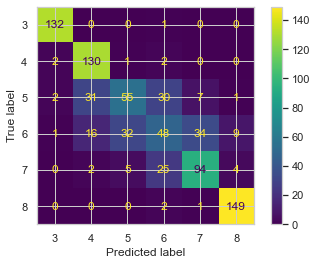

In [66]:
cm_best_red = confusion_matrix(y_red_test, pred_red_best)
disp_best_red = ConfusionMatrixDisplay(confusion_matrix=cm_best_red, display_labels=knn_best_red.classes_)
disp_best_red.plot()
plt.show()

In [67]:
print(classification_report(y_red_test, pred_red_best))

              precision    recall  f1-score   support

           3       0.96      0.99      0.98       133
           4       0.73      0.96      0.83       135
           5       0.59      0.44      0.50       126
           6       0.44      0.34      0.39       140
           7       0.69      0.72      0.71       130
           8       0.91      0.98      0.95       152

    accuracy                           0.75       816
   macro avg       0.72      0.74      0.72       816
weighted avg       0.73      0.75      0.73       816



In [68]:
knn_white_classfier = KNeighborsClassifier()
knn_white_classfier.fit(X_white_train, y_white_train)
y_pred_white = knn_white_classfier.predict(X_white_test)

In [69]:
accuracy_white = accuracy_score(y_white_test, y_pred_white)
accuracy_white

0.8342225609756098

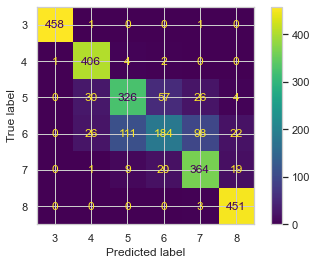

In [70]:
cm_white = confusion_matrix(y_white_test, y_pred_white)
disp_white = ConfusionMatrixDisplay(confusion_matrix=cm_white, display_labels=knn_white_classfier.classes_)
disp_white.plot()
plt.show()

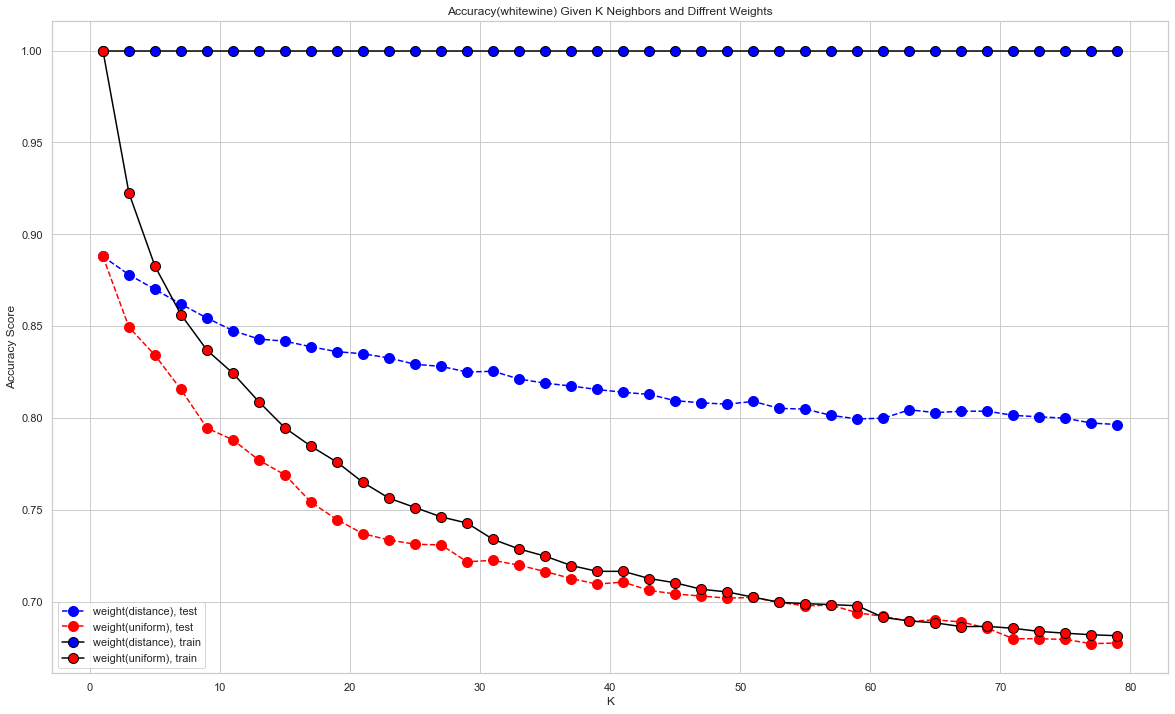

In [71]:
# Tuning parameters
white_test_accuracy_scores_distance = []
white_test_accuracy_scores_uniform = []

white_training_accuracy_distance = []
white_training_accuracy_uniform = []

for i in range(1, 80, 2):
    for w in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=i, weights=w)
        knn.fit(X_white_train, y_white_train)
        y_pred_i = knn.predict(X_white_test)
        acc_test = accuracy_score(y_white_test, y_pred_i)
        acc_training = accuracy_score(y_white_train, knn.predict(X_white_train))

        if w == 'uniform':
            white_test_accuracy_scores_uniform.append(acc_test)
            white_training_accuracy_uniform.append(acc_training)
        else:
            white_test_accuracy_scores_distance.append(acc_test)
            white_training_accuracy_distance.append(acc_training)

plt.figure(figsize =(20, 12))
plt.plot(range(1, 80, 2), white_test_accuracy_scores_distance, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='blue', markersize = 10, label='weight(distance), test')
plt.plot(range(1, 80, 2),white_test_accuracy_scores_uniform, color ='red',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10, label='weight(uniform), test')

plt.plot(range(1, 80, 2),white_training_accuracy_distance, color ='black',
				linestyle ='-', marker ='o',
		markerfacecolor ='blue', markersize = 10, label='weight(distance), train')
plt.plot(range(1, 80, 2),white_training_accuracy_uniform, color ='black',
				linestyle ='-', marker ='o',
		markerfacecolor ='red', markersize = 10, label='weight(uniform), train')


plt.title('Accuracy(whitewine) Given K Neighbors and Diffrent Weights')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.show()

In [72]:
# In order to minimize overfitting problem as well as getting a good accuracy
# we choose k = 13, weights = uniform
knn_best_white = KNeighborsClassifier(n_neighbors=13, weights = 'uniform')
knn_best_white.fit(X_white_train, y_white_train)
pred_white_best = knn_best_white.predict(X_white_test)

accuracy_best_white = accuracy_score(y_white_test, pred_white_best)
accuracy_best_white

0.7770579268292683

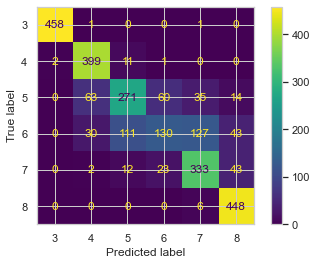

In [73]:
cm_best_white = confusion_matrix(y_white_test, pred_white_best)
disp_best_white = ConfusionMatrixDisplay(confusion_matrix=cm_best_white, display_labels=knn_best_white.classes_)
disp_best_white.plot()
plt.show()

In [74]:
print(classification_report(y_white_test, pred_white_best))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       460
           4       0.81      0.97      0.88       413
           5       0.67      0.61      0.64       443
           6       0.61      0.29      0.40       441
           7       0.66      0.81      0.73       413
           8       0.82      0.99      0.89       454

    accuracy                           0.78      2624
   macro avg       0.76      0.78      0.76      2624
weighted avg       0.76      0.78      0.76      2624



## Gradient Boosting Tree

In [75]:
from sklearn.model_selection import learning_curve

In [76]:
#gradient boosting tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance

In [77]:
def feature_importance_plot(model,data,X_test,y_test):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    fig = plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.barh(pos, feature_importance[sorted_idx], align="center")
    plt.yticks(pos, np.array(data.feature_names)[sorted_idx])
    plt.title("Feature Importance (MDI)")
    plt.show()

In [78]:
#train all wine and tune parameters
clf_all = GradientBoostingClassifier(n_estimators=10,max_depth=10)
clf_all.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=10)

In [79]:
# accuracy_all= accuracy_score(clf_all.predict(X_test), y_test.values)
# accuracy_all

print("train accuracy:",
      accuracy_score(clf_all.predict(X_train), y_train.values),
      "test accuracy:",
      accuracy_score(clf_all.predict(X_test), y_test.values))

train accuracy: 0.9519783286816614 test accuracy: 0.8073286052009456


In [80]:
clf_all_1 = GradientBoostingClassifier(n_estimators=20,max_depth=10)
clf_all_1.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=20)

In [81]:
print("train accuracy:",
      accuracy_score(clf_all_1.predict(X_train), y_train.values),
      "test accuracy:",
      accuracy_score(clf_all_1.predict(X_test), y_test.values))

train accuracy: 0.9852241011328189 test accuracy: 0.8348108747044918


In [82]:
clf_all_2 = GradientBoostingClassifier(n_estimators=40,max_depth=10)
clf_all_2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=40)

In [83]:
print("train accuracy:",
      accuracy_score(clf_all_2.predict(X_train), y_train.values),
      "test accuracy:",
      accuracy_score(clf_all_2.predict(X_test), y_test.values))

train accuracy: 0.9993432933836809 test accuracy: 0.8513593380614657


In [84]:
clf_all_3 = GradientBoostingClassifier(n_estimators=50,max_depth=10)
clf_all_3.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=50)

In [85]:
print("train accuracy:",
      accuracy_score(clf_all_3.predict(X_train), y_train.values),
      "test accuracy:",
      accuracy_score(clf_all_3.predict(X_test), y_test.values))

train accuracy: 0.9999179116729601 test accuracy: 0.8513593380614657


In [86]:
from matplotlib.pyplot import figure

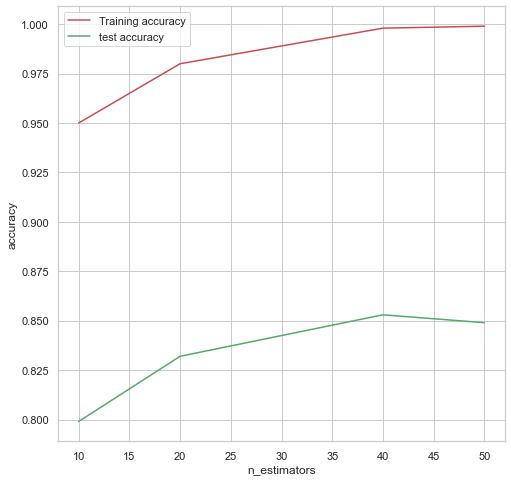

In [87]:
# plot of parameters tuning 
train_accuracy = [0.95,0.98,0.998,0.999]
test_accuracy = [0.799,0.832,0.853,0.849]
n_estimators = [10,20,40,50]
plt.figure(figsize=(8,8))
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.plot(n_estimators,train_accuracy,color="r")
plt.plot(n_estimators,test_accuracy,color="g")
plt.legend(["Training accuracy","test accuracy"])

In [88]:
# tuning max_depth parameter

md = []
train_scores = []
test_scores = []
for i in range(5, 31, 5):
    md.append(i)
    tnclf = GradientBoostingClassifier(n_estimators=45, max_depth=i)
    tnclf.fit(X_train, y_train)
    y_pred_train = tnclf.predict(X_train)
    train_scores.append(round(f1_score(y_pred_train, y_train, average='macro'), 4))
    y_pred_test = tnclf.predict(X_test)
    test_scores.append(round(f1_score(y_pred_test, y_test, average='macro'), 4))

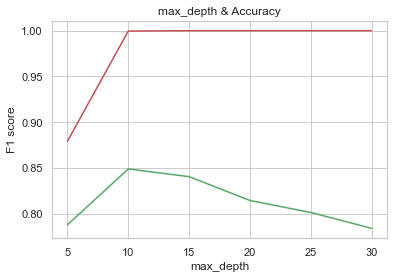

In [89]:
plt.plot(md, train_scores, color="r", label="Training score")
plt.plot(md, test_scores, color="g", label="Testing score")
plt.xlabel('max_depth')
plt.ylabel('F1 score')
plt.title("max_depth & Accuracy")
plt.show()

In [90]:
#best model using all wine data
clf_all_2

GradientBoostingClassifier(max_depth=10, n_estimators=40)

In [91]:
#get classification report
print("All wine - Multi-class results")
print("Train data score")
print(classification_report(y_train, clf_all_2.predict(X_train)))
print("Test data score")
print(classification_report(y_test, clf_all_2.predict(X_test)))

All wine - Multi-class results
Train data score
              precision    recall  f1-score   support

           3       1.00      1.00      1.00      2066
           4       1.00      1.00      1.00      2117
           5       1.00      1.00      1.00      1932
           6       1.00      1.00      1.00      1940
           7       1.00      1.00      1.00      1973
           8       1.00      1.00      1.00      2154

    accuracy                           1.00     12182
   macro avg       1.00      1.00      1.00     12182
weighted avg       1.00      1.00      1.00     12182

Test data score
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       576
           4       0.96      0.93      0.94       585
           5       0.74      0.74      0.74       543
           6       0.65      0.68      0.66       571
           7       0.82      0.81      0.81       525
           8       0.96      0.94      0.95       584

    accuracy 

In [92]:
#train white wine and tune parameters
clf_white = GradientBoostingClassifier(n_estimators=30,max_depth=10)
clf_white.fit(X_white_train, y_white_train)

GradientBoostingClassifier(max_depth=10, n_estimators=30)

In [93]:
accuracy_white = accuracy_score(clf_white.predict(X_white_test), y_white_test.values)
accuracy_white

0.8555640243902439

In [94]:
clf_white_1 = GradientBoostingClassifier(n_estimators=40,max_depth=10)
clf_white_1.fit(X_white_train, y_white_train)

GradientBoostingClassifier(max_depth=10, n_estimators=40)

In [95]:
accuracy_white_1 = accuracy_score(clf_white_1.predict(X_white_test), y_white_test.values)
accuracy_white_1

0.859375

In [96]:
clf_white_2 = GradientBoostingClassifier(n_estimators=50,max_depth=10)
clf_white_2.fit(X_white_train, y_white_train)

GradientBoostingClassifier(max_depth=10, n_estimators=50)

In [97]:
accuracy_white_2 = accuracy_score(clf_white_2.predict(X_white_test), y_white_test.values)
accuracy_white_2

0.8589939024390244

In [98]:
clf_white_3 = GradientBoostingClassifier(n_estimators=60,max_depth=10)
clf_white_3.fit(X_white_train, y_white_train)

GradientBoostingClassifier(max_depth=10, n_estimators=60)

In [99]:
accuracy_white_3 = accuracy_score(clf_white_3.predict(X_white_test), y_white_test.values)
accuracy_white_3

0.8647103658536586

In [100]:
#the best white wine model
clf_white_2

GradientBoostingClassifier(max_depth=10, n_estimators=50)

In [101]:
##get classification report
print("white wine - Multi-class results")
# print("Train data score")
# print(classification_report(y_white_train, clf_white_2.predict(X_white_train)))
print("Test data score")
print(classification_report(y_white_test, clf_white_2.predict(X_white_test)))

white wine - Multi-class results
Test data score
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       460
           4       0.96      0.91      0.94       413
           5       0.76      0.74      0.75       443
           6       0.65      0.68      0.67       441
           7       0.81      0.85      0.83       413
           8       0.97      0.97      0.97       454

    accuracy                           0.86      2624
   macro avg       0.86      0.86      0.86      2624
weighted avg       0.86      0.86      0.86      2624



In [102]:
#train red wine and tune parameters
clf_red = GradientBoostingClassifier(n_estimators=10,max_depth=10)
clf_red.fit(X_red_train, y_red_train)

GradientBoostingClassifier(max_depth=10, n_estimators=10)

In [103]:
accuracy_red = accuracy_score(clf_red.predict(X_red_test), y_red_test.values)
accuracy_red

0.8051470588235294

In [104]:
clf_red_1 = GradientBoostingClassifier(n_estimators=20,max_depth=10)
clf_red_1.fit(X_red_train, y_red_train)

GradientBoostingClassifier(max_depth=10, n_estimators=20)

In [105]:
accuracy_red_1 = accuracy_score(clf_red_1.predict(X_red_test), y_red_test.values)
accuracy_red_1

0.8333333333333334

In [106]:
clf_red_2 = GradientBoostingClassifier(n_estimators=30,max_depth=10)
clf_red_2.fit(X_red_train, y_red_train)

GradientBoostingClassifier(max_depth=10, n_estimators=30)

In [107]:
accuracy_red_2 = accuracy_score(clf_red_2.predict(X_red_test), y_red_test.values)
accuracy_red_2

0.8321078431372549

In [108]:
clf_red_3 = GradientBoostingClassifier(n_estimators=40,max_depth=10)
clf_red_3.fit(X_red_train, y_red_train)

GradientBoostingClassifier(max_depth=10, n_estimators=40)

In [109]:
accuracy_red_3 = accuracy_score(clf_red_3.predict(X_red_test), y_red_test.values)
accuracy_red_3

0.8406862745098039

In [110]:
clf_red_4 = GradientBoostingClassifier(n_estimators=50,max_depth=10)
clf_red_4.fit(X_red_train, y_red_train)

GradientBoostingClassifier(max_depth=10, n_estimators=50)

In [111]:
accuracy_red_4 = accuracy_score(clf_red_4.predict(X_red_test), y_red_test.values)
accuracy_red_4

0.8480392156862745

In [112]:
clf_red_5 = GradientBoostingClassifier(n_estimators=60,max_depth=10)
clf_red_5.fit(X_red_train, y_red_train)

GradientBoostingClassifier(max_depth=10, n_estimators=60)

In [113]:
accuracy_red_5 = accuracy_score(clf_red_5.predict(X_red_test), y_red_test.values)
accuracy_red_5

0.8455882352941176

In [114]:
clf_red_6 = GradientBoostingClassifier(n_estimators=70,max_depth=10)
clf_red_6.fit(X_red_train, y_red_train)

GradientBoostingClassifier(max_depth=10, n_estimators=70)

In [115]:
accuracy_red_6 = accuracy_score(clf_red_6.predict(X_red_test), y_red_test.values)
accuracy_red_6

0.8492647058823529

In [116]:
#the best red wine model
clf_red_5

GradientBoostingClassifier(max_depth=10, n_estimators=60)

In [117]:
print("red wine - Multi-class results")
# print("Train data score")
# print(classification_report(y_red_train, clf_red_5.predict(X_red_train)))
print("Test data score")
print(classification_report(y_red_test, clf_red_5.predict(X_red_test)))

red wine - Multi-class results
Test data score
              precision    recall  f1-score   support

           3       1.00      0.99      1.00       133
           4       0.92      0.93      0.93       135
           5       0.70      0.69      0.70       126
           6       0.61      0.71      0.66       140
           7       0.88      0.75      0.81       130
           8       0.99      0.97      0.98       152

    accuracy                           0.85       816
   macro avg       0.85      0.84      0.84       816
weighted avg       0.85      0.85      0.85       816



In [118]:
# using best all model to test white wine data
# accuracy_white_using_all = accuracy_score(clf_all_2.predict(X_test[X_test.type_white == 1]), y_test[X_test.type_white == 1].values)
# accuracy_white_using_all

print("white wine with best all wine model- Multi-class results")
print("Test data score")
print(classification_report(y_test[X_test.type_white == 1], clf_all_2.predict(X_test[X_test.type_white == 1])))

white wine with best all wine model- Multi-class results
Test data score
              precision    recall  f1-score   support

           3       0.99      0.97      0.98       144
           4       0.96      0.95      0.95       464
           5       0.74      0.73      0.74       380
           6       0.71      0.70      0.71       461
           7       0.82      0.86      0.84       418
           8       0.96      0.97      0.97       551

    accuracy                           0.86      2418
   macro avg       0.86      0.86      0.86      2418
weighted avg       0.86      0.86      0.86      2418



In [119]:
# using best all model to test red wine data
print("red wine with best all wine model- Multi-class results")
print("Test data score")
print(classification_report(y_test[X_test.type_white == 0], clf_all_2.predict(X_test[X_test.type_white == 0])))

red wine with best all wine model- Multi-class results
Test data score
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       432
           4       0.96      0.86      0.91       121
           5       0.72      0.78      0.75       163
           6       0.44      0.59      0.51       110
           7       0.79      0.63      0.70       107
           8       0.81      0.39      0.53        33

    accuracy                           0.84       966
   macro avg       0.79      0.71      0.73       966
weighted avg       0.85      0.84      0.84       966



In [120]:
from sklearn.model_selection import learning_curve

In [121]:
train_sizes = [0.1,0.3,0.6,0.9]
_, train_scores, test_scores = learning_curve(GradientBoostingClassifier(max_depth=10, n_estimators=40), X_train, y_train, train_sizes=train_sizes, cv=10)


Text(0.5, 1.0, 'learning curve of the best mixed wine model')

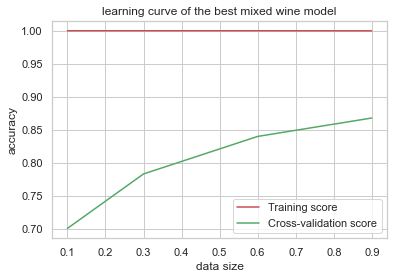

In [122]:
plt.plot(train_sizes,np.mean(train_scores,axis=1),color="r",label="Training score")
plt.plot(train_sizes,np.mean(test_scores,axis=1),color="g",label="Cross-validation score")
plt.legend(["Training score","Cross-validation score"])
plt.xlabel('data size')
plt.ylabel('accuracy')
plt.title("learning curve of the best mixed wine model")